In [1]:
#Package imports needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy

In [2]:
#Load the data as a data frame
df=pd.read_csv('Salary.csv')
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [3]:
# Get basic description of the data, looking the spread of the different variables,
# along with  abrupt changes between the minimum, 25th, 50th, 75th, and max for the different variables
df.describe()

,YearsExperience,Age,Salary
count,30.000000,30.000000,30.000000
mean,5.313333,27.216667,76003.000000
std,2.837888,5.161267,27414.429785
min,1.100000,21.000000,37731.000000
25%,3.200000,23.300000,56720.750000
50%,4.700000,25.000000,65237.000000
75%,7.700000,30.750000,100544.750000
max,10.500000,38.000000,122391.000000


In [4]:
#Get info, look for missing values, get a sense of what format each variable is in


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Age              30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [5]:
#We are attempting to predict score
#Look at correlations between variables to identify best predictor for response (score)
df.corr()

#Can see the strongest predictor of score is cost, with a 96% correlation

,YearsExperience,Age,Salary
YearsExperience,1.000000,0.987258,0.978242
Age,0.987258,1.000000,0.974530
Salary,0.978242,0.974530,1.000000


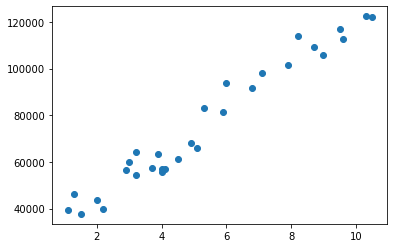

In [6]:
#Let's plot cost vs. score
plt.scatter(df['YearsExperience'], df['Salary']);

#Strong linear association between price and engine size, maybe some concern with model


In [7]:
#Assign x, y then do training testing split
x=df['YearsExperience']
y=df['Salary']

In [8]:
#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

In [9]:
#statsmodel approach to regression
# fit the model
lr = sm.OLS(y_train, x_train).fit()

In [10]:
# Printing the parameters
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              672.6
Date:                Sat, 21 May 2022   Prob (F-statistic):                    1.97e-17
Time:                        13:31:54   Log-Likelihood:                         -240.21
No. Observations:                  22   AIC:                                      482.4
Df Residuals:                      21   BIC:                                      483.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.384e+04    533.705     25.934      0.000    1.27e+04     1.5e+04
==============================================================================
Omnibus:                        0.334   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.846   Jarque-Bera (JB):                0.201
Skew:                          -0.210   Prob(JB):                        0.904
Kurtosis:                       2.794   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:

#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()

/Users/sangramthakur/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     359.5
Date:                Sat, 21 May 2022   Prob (F-statistic):           2.98e-14
Time:                        13:31:54   Log-Likelihood:                -221.85
No. Observations:                  22   AIC:                             447.7
Df Residuals:                      20   BIC:                             449.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.582e+04   2781.493      9.283      0.000       2e+04    3.16e+04
YearsExperience  9657.2266    509.340     18.960      0.000    8594.763    1.07e+04
==============================================================================
Omnibus:                        2.191   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.334   Jarque-Bera (JB):                1.129
Skew:                           0.117   Prob(JB):                        0.569
Kurtosis:                       1.915   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const              25821.855049
YearsExperience     9657.226613
dtype: float64


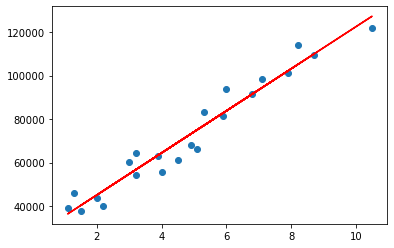

In [12]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
plt.scatter(x_train, y_train)
plt.plot(x_train, b0+ b1*x_train, 'r')
plt.show()

/Users/sangramthakur/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


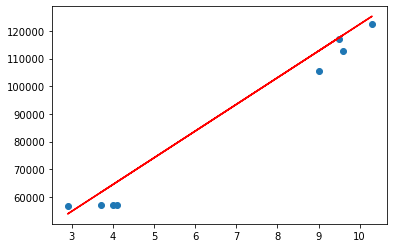

In [13]:
#Plot the fitted line on test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

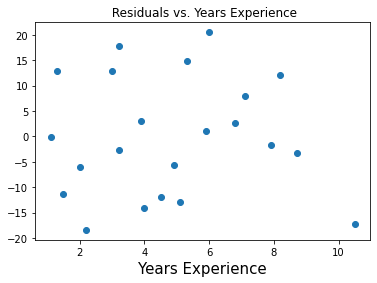

In [27]:
#DIAGNOSTICS

#CHECKLIST:
#1. NON-LINEARITY
#2. NON-CONSTANT VARIANCE
#3. DEVIATIONS FROM NORMALITY
#4. ERRORS NOT IID
#5. OUTLIERS
#6. MISSING PREDICTORS



#Build predictions on training data
predictions_y = lr.predict(x_train_with_intercept)

#Find residuals
r_i = (y_train - predictions_y)


#Residuals vs. predictor in training data
plt.title(' Residuals vs. Years Experience')
plt.xlabel('Years Experience',fontsize=15)
plt.scatter(x_train, r_i)
plt.show()

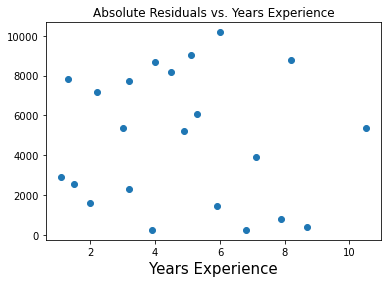

In [15]:
#Absolute residuals against predictor
abs_r_i = np.abs(y_train - predictions_y)
plt.title('Absolute Residuals vs. Years Experience')
plt.xlabel('Years Experience',fontsize=15)
plt.scatter(x_train, abs_r_i)
plt.show()

((array([-1.86607372, -1.43791453, -1.17527742, -0.97550628, -0.80861848,
         -0.66170536, -0.52787584, -0.40291473, -0.28396605, -0.16891711,
         -0.05606845,  0.05606845,  0.16891711,  0.28396605,  0.40291473,
          0.52787584,  0.66170536,  0.80861848,  0.97550628,  1.17527742,
          1.43791453,  1.86607372]),
  array([-9044.71077341, -8656.76149941, -8168.37480578, -7176.75359651,
         -5350.73448213, -5204.26545087, -2576.6949676 , -2279.98020923,
         -1611.30827396, -1436.49206359,  -811.94528904,  -408.72657923,
          -267.03883814,   247.00398495,  2898.19567749,  3884.83600114,
          5356.46511331,  6082.84390404,  7720.01979077,  7828.75035494,
          8800.88672714, 10174.78527513])),
 (6128.374052588655, -2.2384552458825675e-11, 0.9839532828105699))

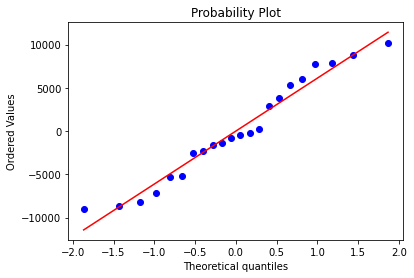

In [16]:
#Normality plot
scipy.stats.probplot(r_i,plot=plt)

/Users/sangramthakur/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

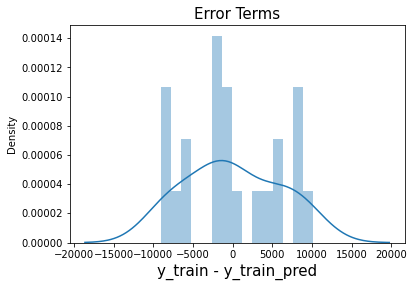

In [17]:
#Tails might be a little heavy, but overall no clear reason to reject normality expectations
# Evaluate normality through histogram of residuals
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(r_i, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show

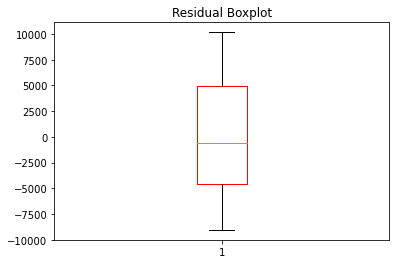

In [18]:
#Boxplot for outliers
# plot
plt.boxplot(r_i, boxprops=dict(color='red'))
plt.title('Residual Boxplot');

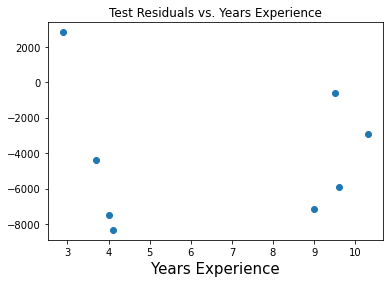

In [19]:
#Demo of how to deal with non-constant variance through transformations

test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Residuals vs. predictor in test set
plt.title('Test Residuals vs. Years Experience')
plt.xlabel('Years Experience',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Some evidence of non-constant variance

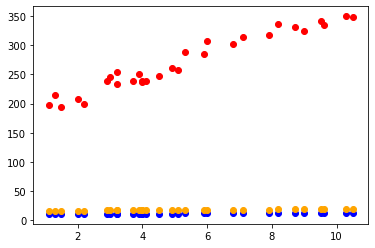

In [20]:
#

#Try sqrt
sqrt_y=np.sqrt(y)
plt.scatter(x, sqrt_y,color='red');

#Try ln
ln_y=np.log(y)
plt.scatter(x, ln_y,color='blue');


#Let's try a BC transformation

#Box Cox procedure on all cost
bc_y=list(stats.boxcox(y))
bc_y=bc_y[0]
plt.scatter(x, bc_y,color='orange');

#Overall, most satisfied with the sqrt transformation

In [21]:
#Run regression on this set

x_train, x_test, y_train, y_test = train_test_split(x, sqrt_y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)


#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()

/Users/sangramthakur/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     315.4
Date:                Sat, 21 May 2022   Prob (F-statistic):           1.03e-13
Time:                        13:32:02   Log-Likelihood:                -84.827
No. Observations:                  22   AIC:                             173.7
Df Residuals:                      20   BIC:                             175.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             178.8882      5.488     32.597      0.000     167.441     190.336
YearsExperience    17.8473      1.005     17.760      0.000      15.751      19.944
==============================================================================
Omnibus:                        2.297   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.317   Jarque-Bera (JB):                1.159
Skew:                           0.127   Prob(JB):                        0.560
Kurtosis:                       1.904   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const              178.888186
YearsExperience     17.847319
dtype: float64


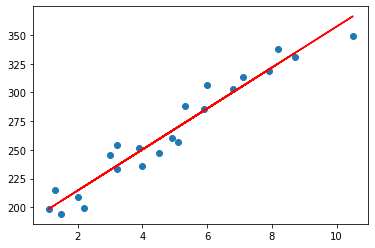

In [22]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
plt.scatter(x_train, y_train)
plt.plot(x_train, b0+ b1*x_train, 'r')
plt.show()

/Users/sangramthakur/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


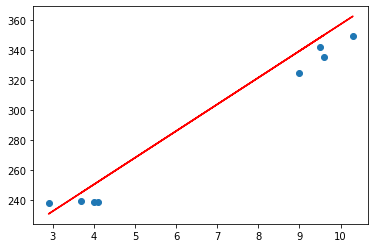

In [23]:
#Plot the fitted line on test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

In [24]:
#Evaluate variance
#Diagnostics
test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

8

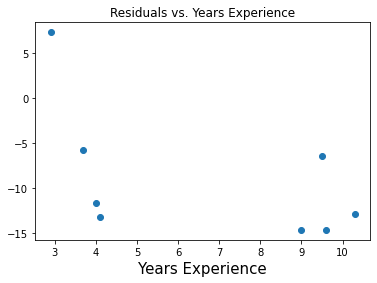

In [25]:
#Residuals vs. predictor
plt.title('Residuals vs. Years Experience')
plt.xlabel('Years Experience',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Non-constant variance reduced, but we also reduced our coefficient of determination